# Peer-Graded K-Means and Spectral Clustering

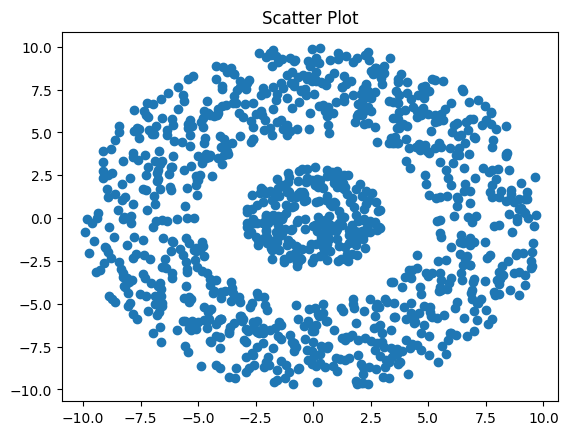

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

data = np.genfromtxt('ConcentricCircles.csv', delimiter=',')[1:,1:]

# Create a scatter plot
plt.scatter(data[:,0], data[:,1])
plt.title('Scatter Plot')

# Show the plot
plt.show()

The data points form a central cloud surrounded by an outer ring of points. There are two distict clusters: the interior cluster and the outer ring.

### Part (b)

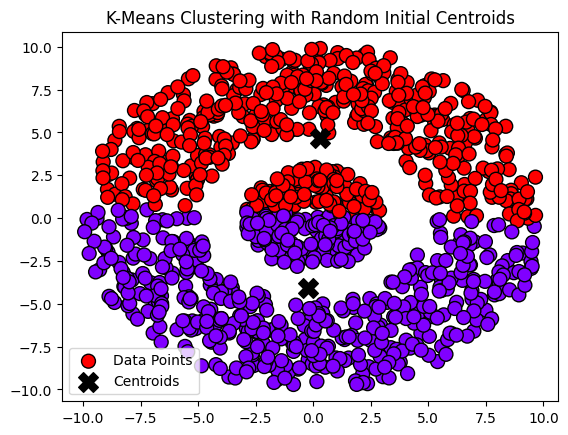

In [13]:
# Create KMeans object with random initialization
kmeans = KMeans(n_clusters=2)

# Fit the KMeans model to the data
kmeans.fit(data)

# Get the final centroid positions
centroids = kmeans.cluster_centers_

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Scatter plot of data points with color-coded clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=100, label='Data Points')

# Scatter plot of final centroid positions
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

# Set labels and legend
plt.title('K-Means Clustering with Random Initial Centroids')
plt.legend()

# Show the plot
plt.show()

This K-Means method does a poor job of clustering the data. The method simply cuts the data points into upper and lower halves, rather than properly identifying the inner and outer clusters.

### Part (c)

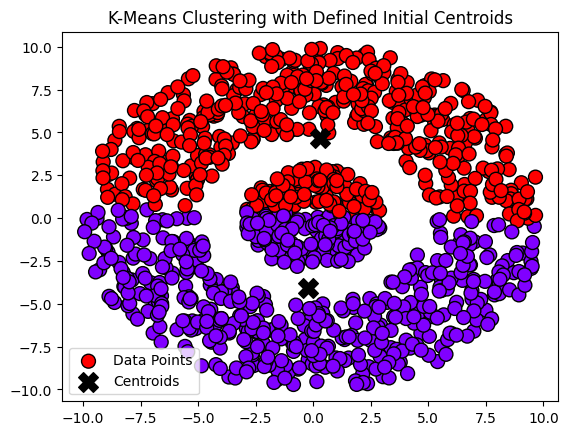

In [18]:
# Custom initial centroid locations
initial_centroids = np.array([[-8,0], [1,-1]])

# Create KMeans object with random initialization
kmeans = KMeans(n_clusters=2)

# Fit the KMeans model to the data
kmeans.fit(data)

# Get the final centroid positions
centroids = kmeans.cluster_centers_

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Scatter plot of data points with color-coded clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=100, label='Data Points')

# Scatter plot of final centroid positions
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

# Set labels and legend
plt.title('K-Means Clustering with Defined Initial Centroids')
plt.legend()

# Show the plot
plt.show()

This method does no better in properly identifying the clusters than the random centroid initialization method.

### Part (d)

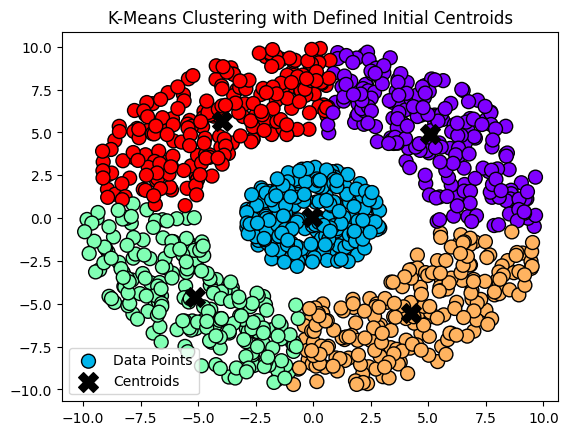

In [19]:
# Custom initial centroid locations
initial_centroids = np.array([[-7.5,0], [0,7.5], [7.5,0], [0,-7.5], [0,0]])

# Create KMeans object with random initialization
kmeans = KMeans(n_clusters=5)

# Fit the KMeans model to the data
kmeans.fit(data)

# Get the final centroid positions
centroids = kmeans.cluster_centers_

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Scatter plot of data points with color-coded clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=100, label='Data Points')

# Scatter plot of final centroid positions
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')

# Set labels and legend
plt.title('K-Means Clustering with Defined Initial Centroids')
plt.legend()

# Show the plot
plt.show()

This method accurately identifies the central cluster of points, but it incorrectly breaks the outer cluster into four partitions. This is not a very good method for correctly identifying the true clusters.

### Part (e)